# MNIST Digit Classification with Neural Network

## 1. Importing Libraries and Loading Data

In this section, we import the necessary libraries and load the MNIST dataset.

In [14]:

import pandas as pd
import numpy as np
from PIL import Image

# Load the datasets
train_data = pd.read_csv('mnist_train.csv')
test_data = pd.read_csv('mnist_test.csv')

# Print the column names
print("Train Data Columns:", train_data.columns)
print("Test Data Columns:", test_data.columns)


Train Data Columns: Index(['5', '0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8',
       ...
       '0.608', '0.609', '0.610', '0.611', '0.612', '0.613', '0.614', '0.615',
       '0.616', '0.617'],
      dtype='object', length=785)
Test Data Columns: Index(['7', '0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8',
       ...
       '0.658', '0.659', '0.660', '0.661', '0.662', '0.663', '0.664', '0.665',
       '0.666', '0.667'],
      dtype='object', length=785)


## 2. Data Preprocessing

Here we preprocess the data by normalizing the pixel values and one-hot encoding the labels.

In [15]:

# Normalize pixel values to [0, 1]
X_train = train_data.iloc[:, 1:].values / 255.0
y_train = train_data.iloc[:, 0].values

X_test = test_data.iloc[:, 1:].values / 255.0
y_test = test_data.iloc[:, 0].values

# One-hot encode the labels
def one_hot_encode(labels, num_classes=10):
    return np.eye(num_classes)[labels]

y_train_encoded = one_hot_encode(y_train)
y_test_encoded = one_hot_encode(y_test)


## 3. Neural Network Implementation

This section defines the NeuralNetwork class with methods for forward propagation, backward propagation, and training.

In [16]:

class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.01):
        self.W1 = np.random.randn(input_size, hidden_size) * 0.01
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size) * 0.01
        self.b2 = np.zeros((1, output_size))
        self.learning_rate = learning_rate

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def sigmoid_derivative(self, z):
        sig = self.sigmoid(z)
        return sig * (1 - sig)

    def softmax(self, z):
        exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)

    def forward(self, X):
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.sigmoid(self.z1)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = self.softmax(self.z2)
        return self.a2

    def backward(self, X, y):
        m = X.shape[0]
        delta2 = self.a2 - y
        dW2 = np.dot(self.a1.T, delta2) / m
        db2 = np.sum(delta2, axis=0, keepdims=True) / m

        delta1 = np.dot(delta2, self.W2.T) * self.sigmoid_derivative(self.z1)
        dW1 = np.dot(X.T, delta1) / m
        db1 = np.sum(delta1, axis=0, keepdims=True) / m

        self.W1 -= self.learning_rate * dW1
        self.b1 -= self.learning_rate * db1
        self.W2 -= self.learning_rate * dW2
        self.b2 -= self.learning_rate * db2

    def train(self, X, y, epochs=10, batch_size=64):
        for epoch in range(epochs):
            indices = np.arange(X.shape[0])
            np.random.shuffle(indices)
            X = X[indices]
            y = y[indices]

            for i in range(0, X.shape[0], batch_size):
                X_batch = X[i:i + batch_size]
                y_batch = y[i:i + batch_size]
                self.forward(X_batch)
                self.backward(X_batch, y_batch)

            if (epoch + 1) % 1 == 0:
                loss = self.calculate_loss(X, y)
                print(f'Epoch {epoch + 1}/{epochs}, Loss: {loss}')

    def calculate_loss(self, X, y):
        m = X.shape[0]
        predictions = self.forward(X)
        loss = -np.sum(y * np.log(predictions + 1e-8)) / m
        return loss

    def predict(self, X):
        predictions = self.forward(X)
        return np.argmax(predictions, axis=1)
    def predict_image(self, image_path):
        # Load and preprocess the image
        image = Image.open(image_path).convert('L')  # Convert to grayscale
        image = image.resize((28, 28))  # Resize to 28x28 pixels
        image_array = np.array(image).astype(np.float32) / 255.0  # Normalize pixel values
        image_array = image_array.reshape(1, -1)  # Flatten the image
        
        # Perform prediction
        predictions = self.forward(image_array)
        predicted_class = np.argmax(predictions, axis=1)[0]
        confidence = np.max(predictions, axis=1)[0]  # Maximum value in the softmax output
        
        return predicted_class, confidence


    def evaluate_image_accuracy(self, image_path, true_label):
        predicted_class = self.predict_image(image_path)
        accuracy = int(predicted_class == true_label)
        return predicted_class, accuracy
    
    def display_image(self, image_path):
        image = Image.open(image_path).convert('L')
        plt.imshow(image, cmap='gray')
        plt.axis('off')  # Hide axes
        plt.show()



## 4. Training the Neural Network

In this section, we initialize the neural network and train it on the MNIST dataset.

In [17]:

# Initialize and train the neural network
input_size = X_train.shape[1]
hidden_size = 128
output_size = 10
learning_rate = 0.01

nn = NeuralNetwork(input_size, hidden_size, output_size, learning_rate)

# Train the model
nn.train(X_train, y_train_encoded, epochs=10)


Epoch 1/10, Loss: 2.267879299816604
Epoch 2/10, Loss: 2.0451641426048672
Epoch 3/10, Loss: 1.5302371384556817
Epoch 4/10, Loss: 1.1282760536905652
Epoch 5/10, Loss: 0.888511303793344
Epoch 6/10, Loss: 0.7410524681644666
Epoch 7/10, Loss: 0.6449800301213804
Epoch 8/10, Loss: 0.5784094817497745
Epoch 9/10, Loss: 0.5301715366113381
Epoch 10/10, Loss: 0.493058359248371


## 5. Evaluating the Model

Here we evaluate the trained model on both the training and test sets.

In [18]:

# Evaluate the model
train_predictions = nn.predict(X_train)
test_predictions = nn.predict(X_test)

# Convert one-hot encoded labels to class indices for accuracy calculation
y_train_class = np.argmax(y_train_encoded, axis=1)
y_test_class = np.argmax(y_test_encoded, axis=1)

train_accuracy = np.mean(train_predictions == y_train_class)
test_accuracy = np.mean(test_predictions == y_test_class)

print(f'Train accuracy: {train_accuracy}')
print(f'Test accuracy: {test_accuracy}')


Train accuracy: 0.872097868297805
Test accuracy: 0.877087708770877


## 6. Predicting and Evaluating a Single Image

Finally, we use the trained model to predict the digit in a single image and evaluate its accuracy.

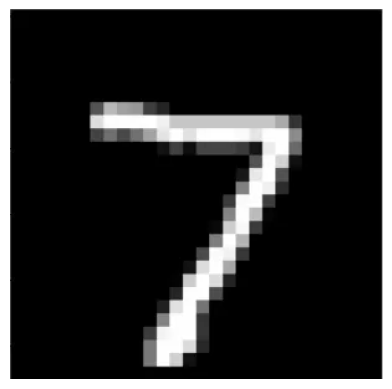

Predicted class for the image: 7
Confidence of prediction: 0.9704
Accuracy of prediction: 1


In [20]:
import matplotlib.pyplot as plt

# Predict and evaluate a single image
image_path = 'sample_image-300x298.webp'  # Replace with your image path
true_label = 7  # Replace with the true label of your image

# Display the image
nn.display_image(image_path)

# Get prediction and confidence
predicted_class, confidence = nn.predict_image(image_path)
print(f'Predicted class for the image: {predicted_class}')
print(f'Confidence of prediction: {confidence:.4f}')  # Print confidence rounded to 4 decimal places

# Evaluate accuracy
accuracy = int(predicted_class == true_label)
print(f'Accuracy of prediction: {accuracy}')
